# Credit Risk Data

Importing libraries

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score,recall_score, f1_score
import seaborn as sns

# Exploratory Data Analysis

In [46]:
df = pd.read_csv("/Users/joanaperdigoto/Desktop/Postgraduate in Data Analytics /Second Semester/DMML/2023/Credit_Risk_Dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [47]:
df.shape

(32581, 12)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [49]:
df['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

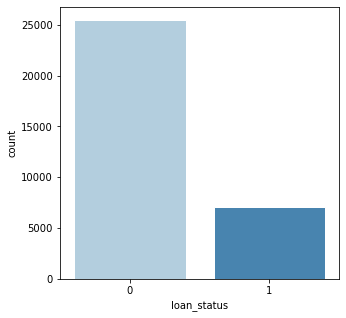

In [50]:
plt.figure(figsize=(5,5))
sns.countplot(x=df["loan_status"], palette = 'Blues', edgecolor = 'w')

In [51]:
df.duplicated().sum()

165

In [52]:
df.drop_duplicates()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


Check numerical variables

In [53]:
numerical_columns = pd.DataFrame(df[df.select_dtypes(include=['float', 'int']).columns])
numerical_columns.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

Check for NaN (%)

In [54]:
NaN = df.isnull().sum()/df.shape[0]*100
NaN.round(1)

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             2.7
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 9.6
loan_status                   0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

There are 2 Variables with null fields: 'loan_int_rate' and 'person_emp_length'. Checked Average and Mode to decide replacements.

In [55]:
print('person_emp_length mode {}'.format(df['person_emp_length'].mode()[0]))
print('person_emp_length mean {}'.format(df['person_emp_length'].mean()))

person_emp_length mode 0.0
person_emp_length mean 4.789686296787225


In [56]:
print('loan_int_rate mode {}'.format(df['loan_int_rate'].mode()[0]))
print('loan_int_rate mean {}'.format(df['loan_int_rate'].mean()))

loan_int_rate mode 7.51
loan_int_rate mean 11.01169489224439


Person employment history (person_emp_length): the nan values are replaced with mode of 0 years.

Loan Income Rate (loan_int_rate): the nan values are replaced with mean of 11%.

In [57]:
df['person_emp_length'].fillna(df['person_emp_length'].mode()[0], inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)

Check if the NaN have been replaced:

In [58]:
NaN = df.isnull().sum()/df.shape[0]*100
NaN.round(1)

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_status                   0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

In [59]:
df.describe() 

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.658114,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.159669,6322.086646,3.081605,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.011695,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Remove the "loan status" and visualize the distribution for each variable

/Users/joanaperdigoto/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joanaperdigoto/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/joanaperdigoto/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

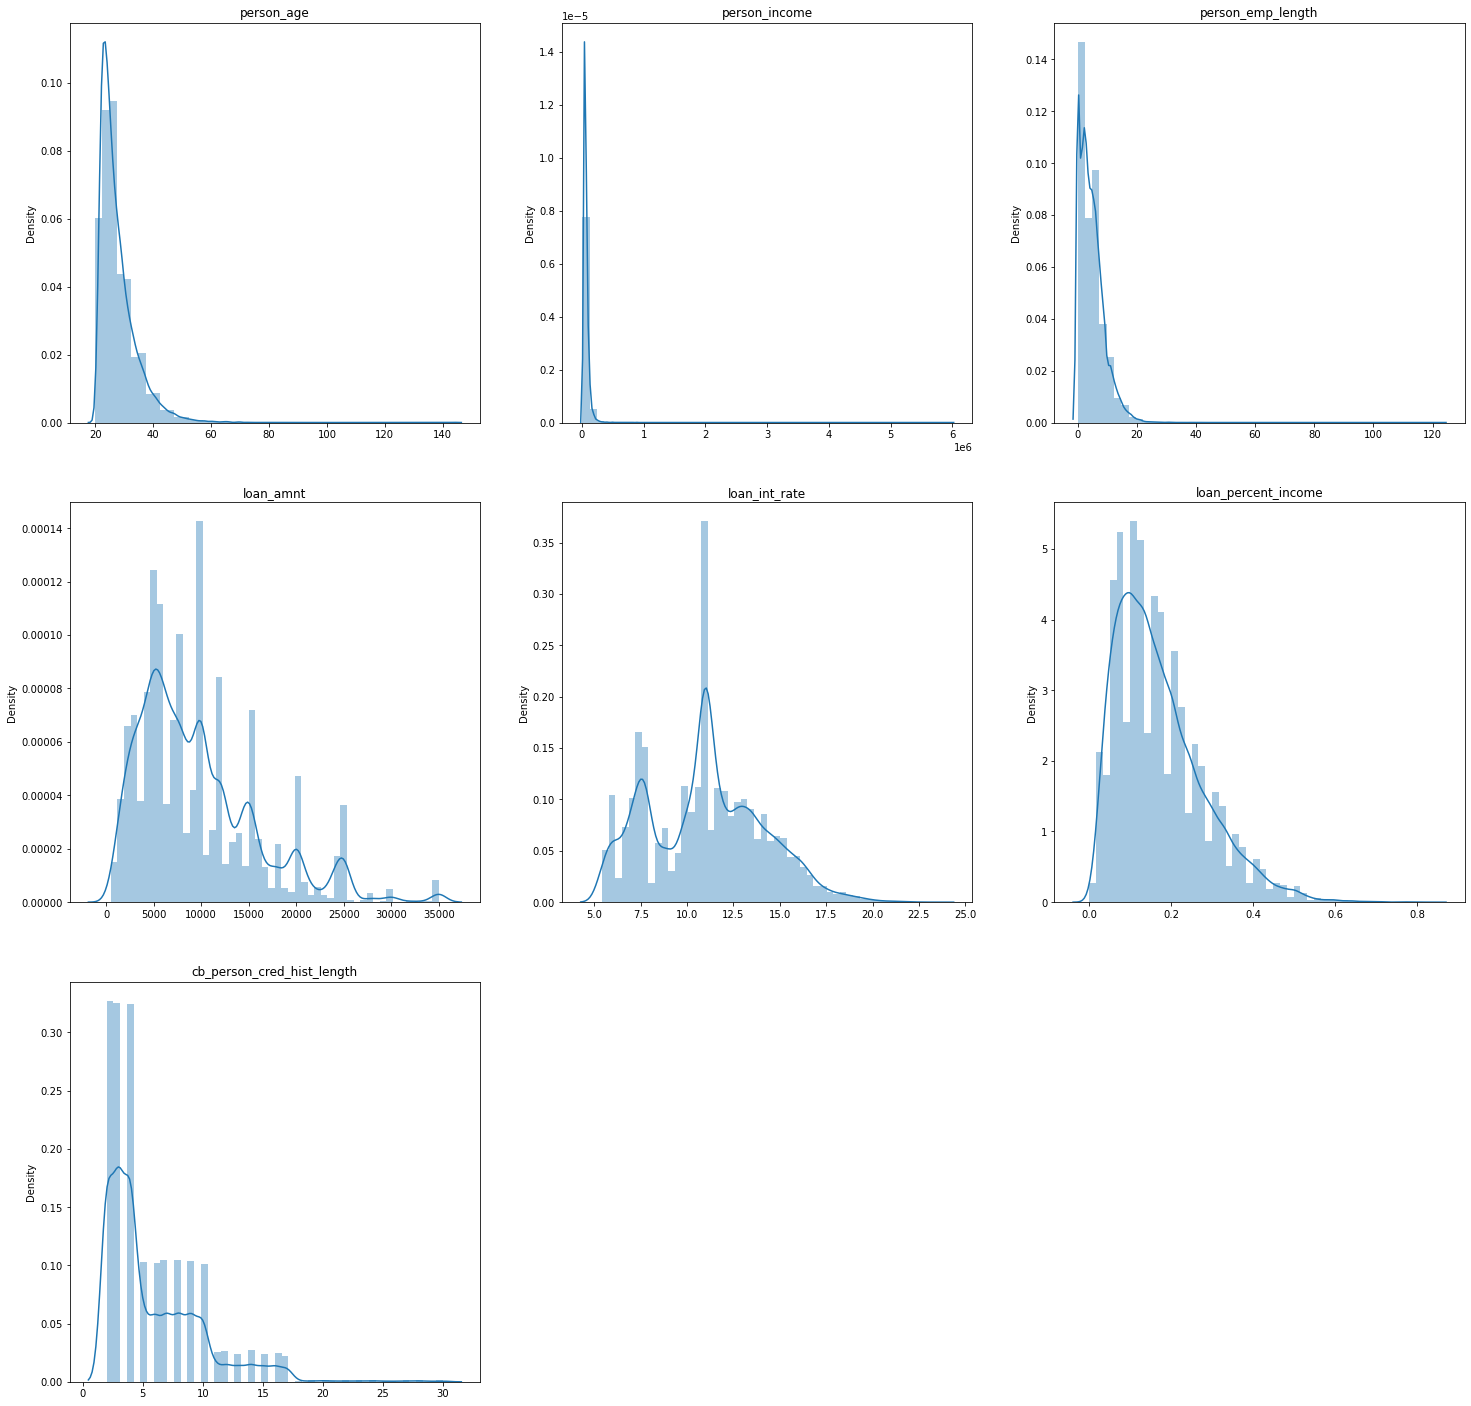

In [60]:
numerical_columns_hist = numerical_columns.drop(['loan_status'], axis=1)

plt.figure(figsize = (25, 25))
for i in enumerate(numerical_columns_hist):
    plt.subplot(3, 3,i[0]+1)
    sns.distplot(df, x = df[i[1]])
    plt.title(i[1])

The tail of a distribution curve is longer on the right side, which means all of these variables are positively skewed.


/Users/joanaperdigoto/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person_age'>

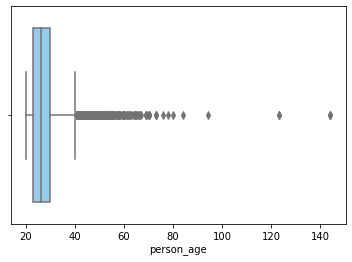

In [61]:
sns.boxplot(df.person_age, color='lightskyblue')

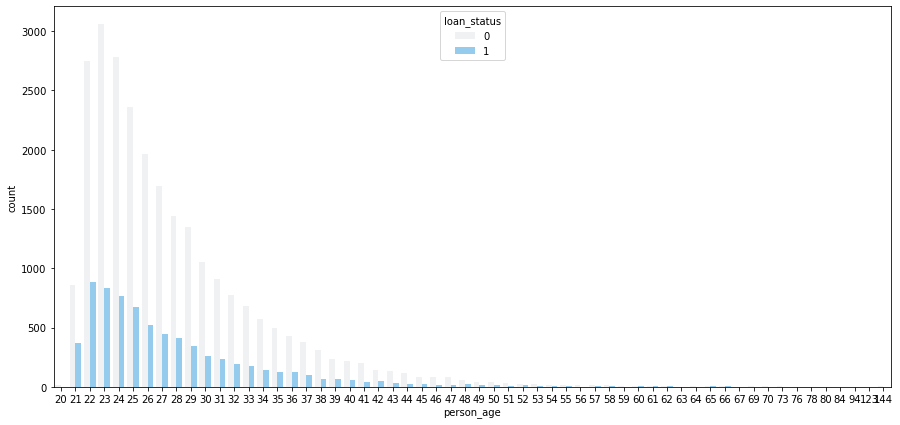

In [62]:
plt.figure(figsize=[15,7])
sns.countplot(x = 'person_age', hue= 'loan_status', data=df, color='lightskyblue');

Younger people have an higher tendency to default (loan_status = 1).

We will consider only people with age below 80.

/Users/joanaperdigoto/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person_income'>

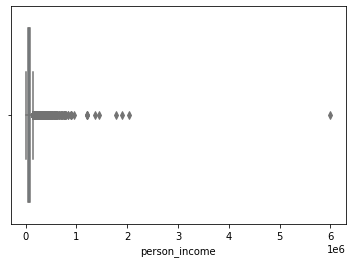

In [63]:
sns.boxplot(df.person_income, color='lightskyblue')

We will remove salaries above 2 million.

/Users/joanaperdigoto/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person_emp_length'>

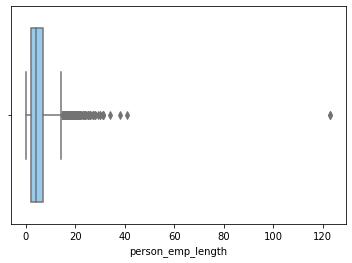

In [64]:
sns.boxplot(df.person_emp_length, color='lightskyblue')

We will consider emplyment lenght above 40 years as outliers.

Data Cleaning by droping the outliers accordingly:

In [65]:
cleaned_df = df[df['person_age']<=80]
cleaned_df = cleaned_df[cleaned_df['person_income']<=2e6]
cleaned_df = cleaned_df[cleaned_df['person_emp_length']<=40]

Cleaned numerical variables

In [66]:
cleaned_numerical_columns = pd.DataFrame(cleaned_df[cleaned_df.select_dtypes(include=['float', 'int']).columns])

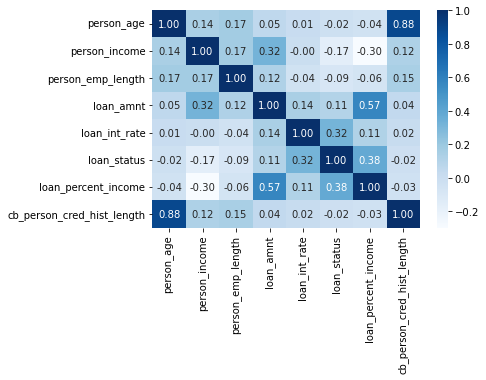

In [67]:
sns.heatmap(cleaned_numerical_columns.corr(), cmap='Blues', annot=True, fmt='.2f'); 

Variables with negative correlation with the loan_status: person_age, person_income, person_emp_length and cb_person_cred_hist_length (the larger these values, the lower the credit risk of this person)

Variables with a positive correlation with the loan_status: loan_amnt, loan_int_rate, loan_percent_income (the larger these values, the higher the credit risk of this person)

Check categorical variables

In [68]:
categorical_columns = pd.DataFrame(cleaned_df[cleaned_df.select_dtypes(include=['object']).columns])
categorical_columns.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

Encode categorical variables

In [69]:
encoded_categorical_columns = pd.get_dummies(categorical_columns)

Concatenate the numerical and categorical variables

In [70]:
cleaned_df = pd.concat([cleaned_numerical_columns, encoded_categorical_columns], axis=1)
cleaned_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,...,1,1,0,0,0,0,0,0,1,0


# Modelling & Evaluation of its Accuracy

Split the data into training and test data

In [71]:
X = cleaned_df.drop("loan_status", axis=1)
Y = cleaned_df.loan_status
X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# X_train = train_test_split(x, y, test_size=0.2)
# print(type(X_train),len(X_train))
# for x in X_train:
#     print(len(x),type(x))

In [72]:
print('The train dataset has {} data\nThe test dataset has {} data'.
      format(X_train.shape[0], x_test.shape[0]))

The train dataset has 26056 data
The test dataset has 6514 data


Decision Tree model

In [73]:
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)
accuracy_train = decision_tree.score(X_train, y_train)
accuracy_test = accuracy_score(y_test, decision_tree.predict(x_test))
print('Train Data Accuracy: %.2f%%' % (accuracy_train * 100))
print ("Decision Tree Accuracy: %.2f%%" % (accuracy_test*100))

Train Data Accuracy: 100.00%
Decision Tree Accuracy: 89.09%


Naive Bayes model

In [74]:
nBayes = GaussianNB()
nBayes = nBayes.fit(X_train, y_train)
accuracy_train = nBayes.score(X_train, y_train)
accuracy_test = accuracy_score(y_test, nBayes.predict(x_test))
print('Train Data Accuracy: %.2f%%' % (accuracy_train * 100))
print ("Naive Bayes Accuracy: %.2f%%" % (accuracy_test*100))

Train Data Accuracy: 81.89%
Naive Bayes Accuracy: 81.23%


SVM model

In [75]:
svc = SVC()
svc = svc.fit(X_train, y_train)
accuracy_train = svc.score(X_train, y_train)
accuracy_test = accuracy_score(y_test, svc.predict(x_test))
print('Train Data Accuracy: %.2f%%' % (accuracy_train * 100))
print ("SVM Accuracy: %.2f%%" % (accuracy_test*100))

Train Data Accuracy: 81.06%
SVM Accuracy: 80.33%


Random Forest model

In [76]:
random_forest = RandomForestClassifier()
random_forest = random_forest.fit(X_train, y_train)
accuracy_train = random_forest.score(X_train, y_train)
accuracy_test = accuracy_score(y_test, random_forest.predict(x_test))
print('Train Data Accuracy: %.2f%%' % (accuracy_train * 100))
print ("Random Forest Accuracy: %.2f%%" % (accuracy_test*100))

Train Data Accuracy: 100.00%
Random Forest Accuracy: 93.35%


Logistic Regression

Applying normalization

In [77]:
scaler = MinMaxScaler().fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(x_test)

In [78]:
LR = LogisticRegression()
LR.fit(X_train_norm, y_train)
accuracy_train = LR.score(X_train_norm, y_train)
accuracy_test = accuracy_score(y_test, LR.predict(X_test_norm))
print('Train Data Accuracy: %.2f%%' % (accuracy_train * 100))
print ("Logistic Regression Accuracy: %.2f%%" % (accuracy_test*100))

Train Data Accuracy: 86.86%
Logistic Regression Accuracy: 86.20%


/Users/joanaperdigoto/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Additional Performance metrics

**Accuracy** means that the ratio of the correctly labeled subjects to the whole pool of subjects.

**Precision** is the ratio of the correctly positive labeled to all positive labeled.

**Recall** is the ratio of positive predicted to all who are real positive

**f1_score** considers both precision and recall.

Decision Tree

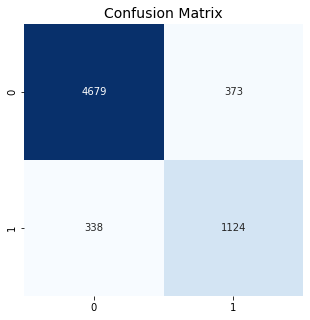

In [79]:
plt.figure(figsize=(5,5))

sns.heatmap(confusion_matrix(y_test,decision_tree.predict(x_test)), annot=True, cmap='Blues', fmt='g', cbar=False)

plt.title("Confusion Matrix", fontsize=14)

plt.show()

In [80]:
accuracy = accuracy_score(y_test, decision_tree.predict(x_test))
precision = precision_score(y_test, decision_tree.predict(x_test))
recall = recall_score(y_test, decision_tree.predict(x_test))
fscore = f1_score(y_test, decision_tree.predict(x_test))

print('Accuracy test data: %.2f%%' % (accuracy * 100.0))
print('Precision test data: %.2f%%' % (precision * 100.0))
print('Recall test data: %.2f%%' % (recall * 100.0))
print('F1_score test data: %.2f%%' % (fscore * 100.0))

Accuracy test data: 89.09%
Precision test data: 75.08%
Recall test data: 76.88%
F1_score test data: 75.97%


Naive Bayes

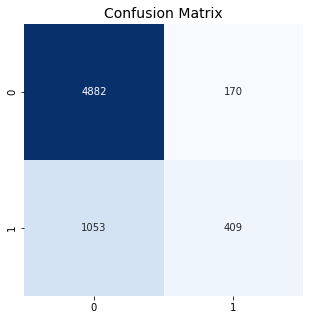

In [81]:
plt.figure(figsize=(5,5))

sns.heatmap(confusion_matrix(y_test,nBayes.predict(x_test)), annot=True, cmap='Blues', fmt='g', cbar=False)

plt.title("Confusion Matrix", fontsize=14)

plt.show()

In [82]:
accuracy = accuracy_score(y_test, nBayes.predict(x_test))
precision = precision_score(y_test, nBayes.predict(x_test))
recall = recall_score(y_test, nBayes.predict(x_test))
fscore = f1_score(y_test, nBayes.predict(x_test))

print('Accuracy test data: %.2f%%' % (accuracy * 100.0))
print('Precision test data: %.2f%%' % (precision * 100.0))
print('Recall test data: %.2f%%' % (recall * 100.0))
print('F1_score test data: %.2f%%' % (fscore * 100.0))

Accuracy test data: 81.23%
Precision test data: 70.64%
Recall test data: 27.98%
F1_score test data: 40.08%


SVM

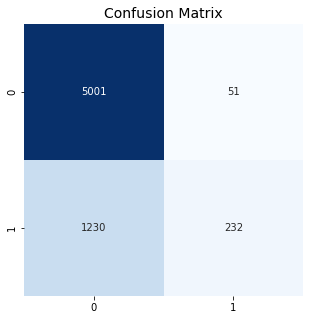

In [83]:
plt.figure(figsize=(5,5))

sns.heatmap(confusion_matrix(y_test,svc.predict(x_test)), annot=True, cmap='Blues', fmt='g', cbar=False)

plt.title("Confusion Matrix", fontsize=14)

plt.show()

In [84]:
accuracy = accuracy_score(y_test, svc.predict(x_test))
precision = precision_score(y_test, svc.predict(x_test))
recall = recall_score(y_test, svc.predict(x_test))
fscore = f1_score(y_test, svc.predict(x_test))

print('Accuracy test data: %.2f%%' % (accuracy * 100.0))
print('Precision test data: %.2f%%' % (precision * 100.0))
print('Recall test data: %.2f%%' % (recall * 100.0))
print('F1_score test data: %.2f%%' % (fscore * 100.0))

Accuracy test data: 80.33%
Precision test data: 81.98%
Recall test data: 15.87%
F1_score test data: 26.59%


Random Forest

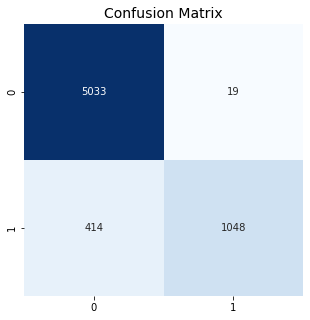

In [85]:
plt.figure(figsize=(5,5))

sns.heatmap(confusion_matrix(y_test,random_forest.predict(x_test)), annot=True, cmap='Blues', fmt='g', cbar=False)

plt.title("Confusion Matrix", fontsize=14)

plt.show()

In [86]:
accuracy = accuracy_score(y_test, random_forest.predict(x_test))
precision = precision_score(y_test, random_forest.predict(x_test))
recall = recall_score(y_test, random_forest.predict(x_test))
fscore = f1_score(y_test, random_forest.predict(x_test))

print('Accuracy test data: %.2f%%' % (accuracy * 100.0))
print('Precision test data: %.2f%%' % (precision * 100.0))
print('Recall test data: %.2f%%' % (recall * 100.0))
print('F1_score test data: %.2f%%' % (fscore * 100.0))

Accuracy test data: 93.35%
Precision test data: 98.22%
Recall test data: 71.68%
F1_score test data: 82.88%


Logistic Regression

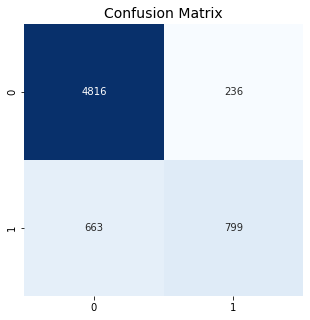

In [87]:
plt.figure(figsize=(5,5))

sns.heatmap(confusion_matrix(y_test,LR.predict(X_test_norm)), annot=True, cmap='Blues', fmt='g', cbar=False)

plt.title("Confusion Matrix", fontsize=14)

plt.show()

In [88]:
accuracy = accuracy_score(y_test, LR.predict(X_test_norm))
precision = precision_score(y_test, LR.predict(X_test_norm))
recall = recall_score(y_test, LR.predict(X_test_norm))
fscore = f1_score(y_test, LR.predict(X_test_norm))

print('Accuracy test data: %.2f%%' % (accuracy * 100.0))
print('Precision test data: %.2f%%' % (precision * 100.0))
print('Recall test data: %.2f%%' % (recall * 100.0))
print('F1_score test data: %.2f%%' % (fscore * 100.0))

Accuracy test data: 86.20%
Precision test data: 77.20%
Recall test data: 54.65%
F1_score test data: 64.00%
